In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table, weekday_time_series
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [19]:
df_1T = weekday_time_series(sensor_id='hauptluftung_30T')

In [20]:
px.line(
    x=df_1T.index, y=df_1T.kw, 
    title='Hauptlüftung (Main Ventilation) \n Subsystem = HVAC',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

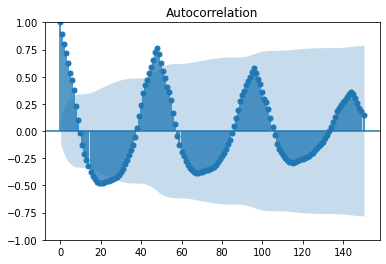

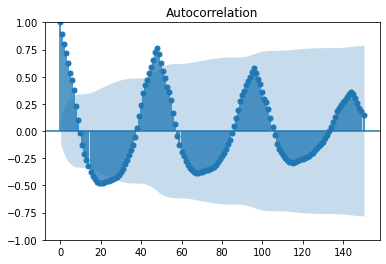

In [21]:
plot_acf(df_1T.kw.values.squeeze(), lags=150)

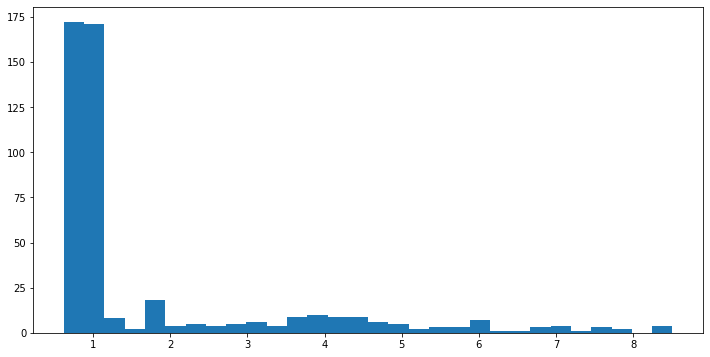

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(x=df_1T.kw, bins=30)
plt.show()